In [168]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
import numpy as np
import math
import os
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
import scipy.io as sio

from generate_data_files import read_out_arrays
from ripple_detection import Karlsson_ripple_detector, Kay_ripple_detector
from ripple_detection.simulate import simulate_time

In [170]:
data_path='../data/m4000series_LFP_ripple.mat'
data = sio.loadmat(data_path)
keys = [key for key in data.keys() if key.startswith("m")]

sf = 2.5e3

In [171]:
lfp, speed, ripple_index = read_out_arrays(data[keys[0]])
time = simulate_time(lfp.shape[0], sf)

ripple_times = time[ripple_index]

In [179]:
ripples = Kay_ripple_detector(time, lfp, speed.flatten(), sf,
                              speed_threshold=0.00, minimum_duration=0.015,
                              zscore_threshold=1., smoothing_sigma=0.004,
                              close_ripple_threshold=0.0)

ripple_start = np.array(ripples.loc[:,'start_time'])
ripple_end = np.array(ripples.loc[:,'end_time'])

In [180]:
detection_flag = np.zeros_like(ripple_times)
for i in range(ripple_times.shape[0]):
    mask = np.logical_and(ripple_start<=ripple_times[i], ripple_times[i]<=ripple_end)
    detection_flag[i] = mask.sum()
    
efficency = detection_flag.sum()/detection_flag.shape[0]
confusion = 1 - detection_flag.sum()/ripple_start.shape[0]

print(efficency, confusion)
print(detection_flag.sum(), ripple_start.shape[0]-detection_flag.sum())

0.9807692307692307 0.7926829268292683
153.0 585.0


<IPython.core.display.Javascript object>


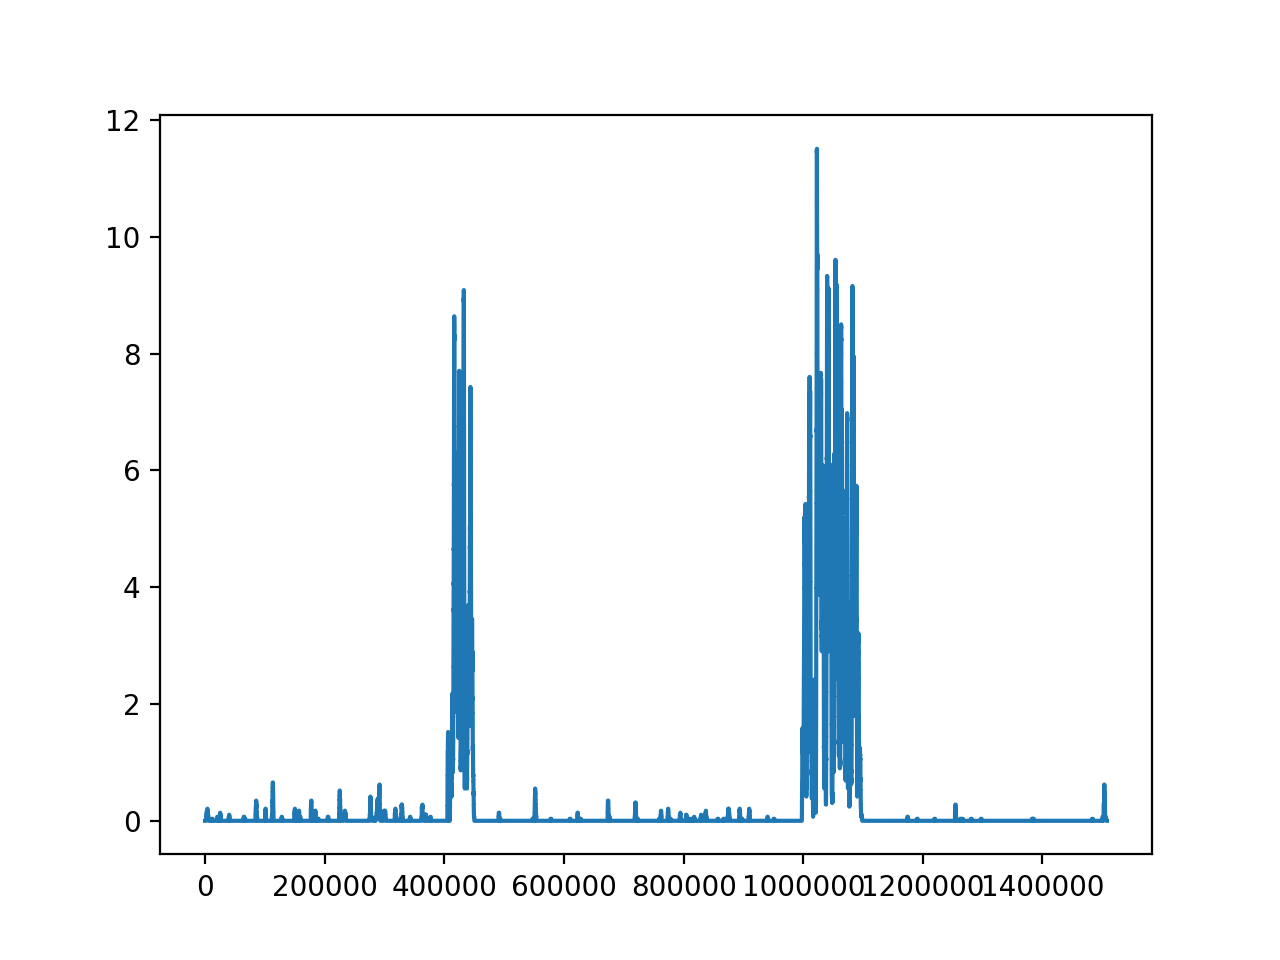

In [174]:
plt.figure()
plt.plot(speed)
plt.show()